In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.xlsx - in.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7032, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


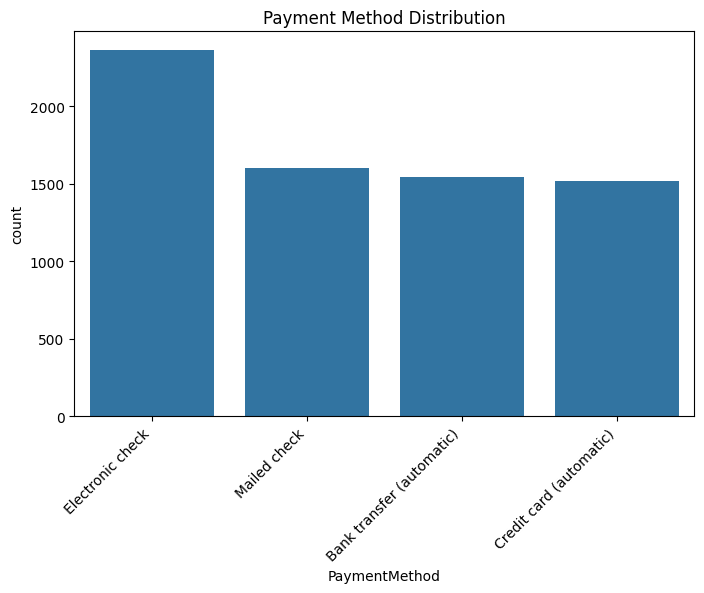

In [ ]:
plt.figure(figsize=(8, 5))

sns.countplot(x='PaymentMethod', data=df, order=df['PaymentMethod'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

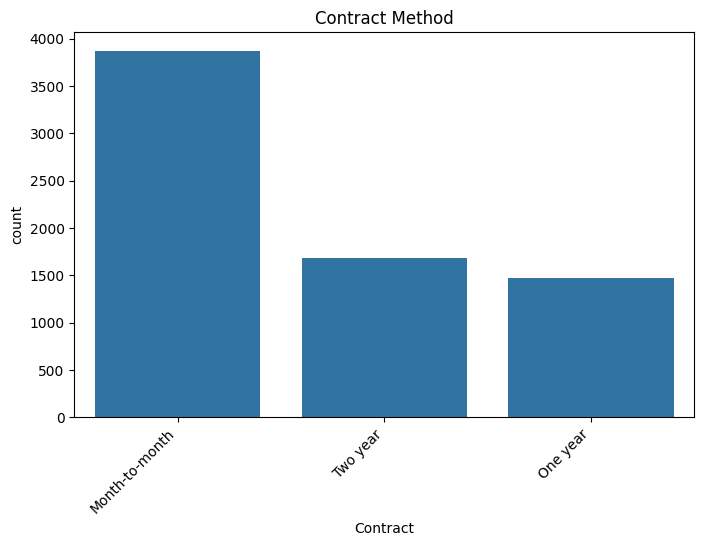

In [ ]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Contract', data=df, order=df['Contract'].value_counts().index)
plt.title('Contract Method')
plt.xticks(rotation=45, ha='right')
plt.show()

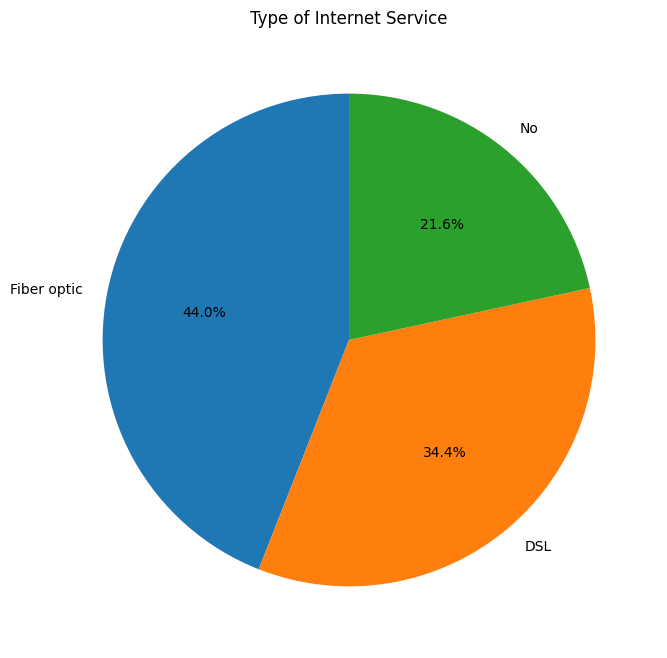

In [ ]:
payment_method_counts = df['InternetService'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Type of Internet Service')

plt.show()

<ipython-input-12-023a061e0654>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


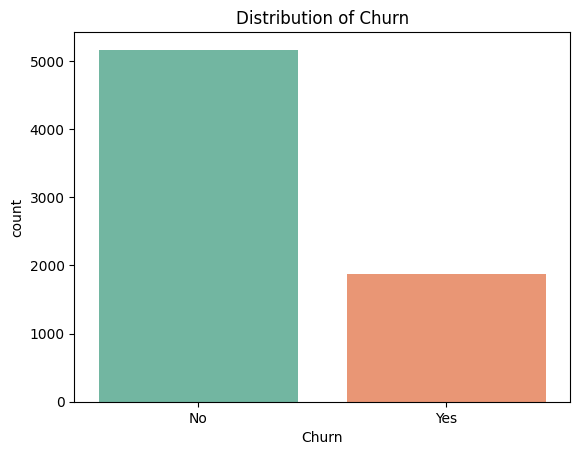

In [ ]:
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn')
plt.show()

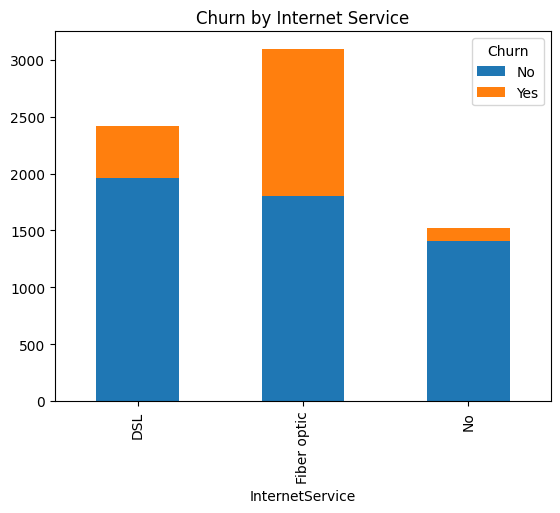

In [ ]:
churn_internet = pd.crosstab(df['InternetService'], df['Churn'])
churn_internet.plot(kind='bar', stacked=True)
plt.title('Churn by Internet Service')
plt.show()

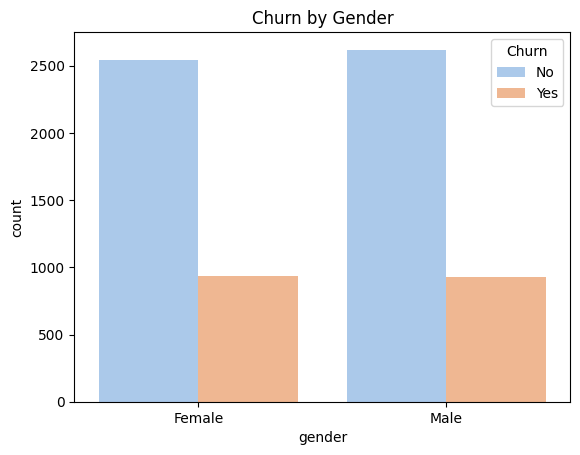

In [ ]:
sns.countplot(x='gender', hue='Churn', data=df, palette='pastel')
plt.title('Churn by Gender')
plt.show()

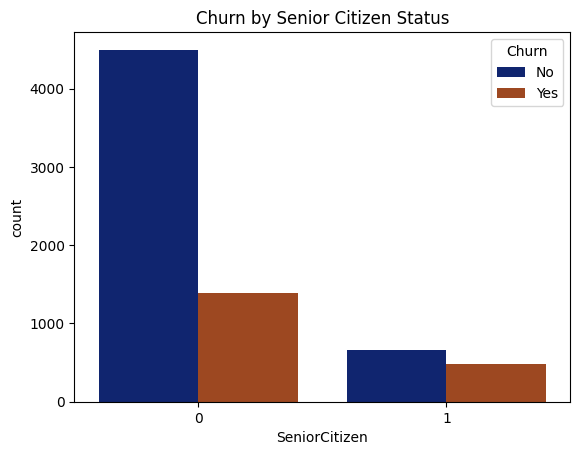

In [ ]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='dark')
plt.title('Churn by Senior Citizen Status')
plt.show()

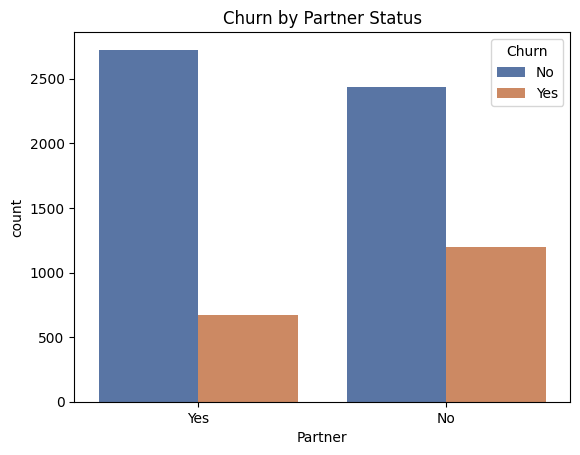

In [ ]:
sns.countplot(x='Partner', hue='Churn', data=df, palette='deep')
plt.title('Churn by Partner Status')
plt.show()

<ipython-input-17-5060e2d1e131>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')


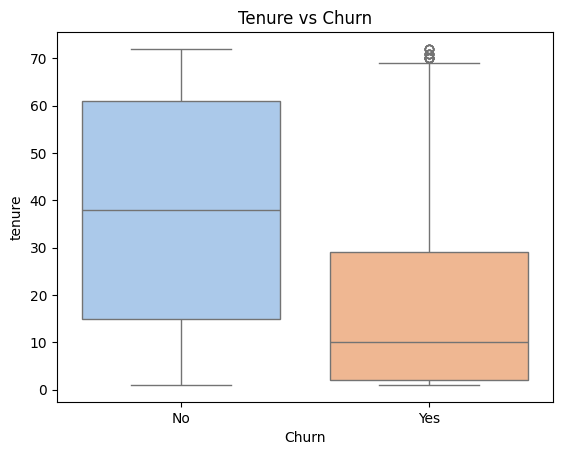

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')
plt.title('Tenure vs Churn')
plt.show()

<ipython-input-18-989300d5d76a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='colorblind')


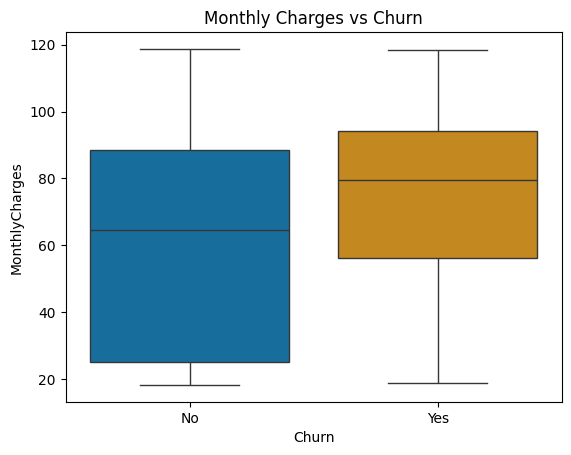

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='colorblind')
plt.title('Monthly Charges vs Churn')
plt.show()

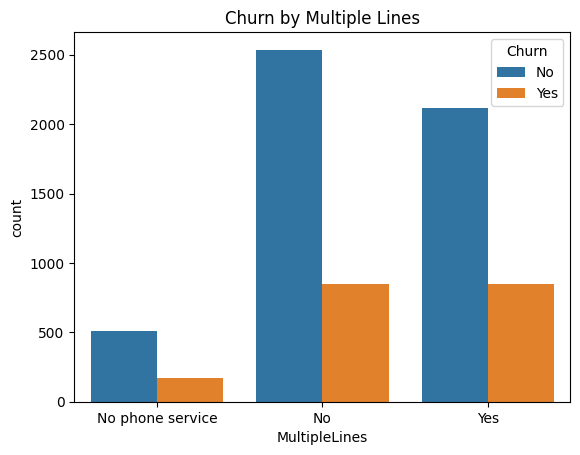

In [ ]:
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn by Multiple Lines')
plt.show()

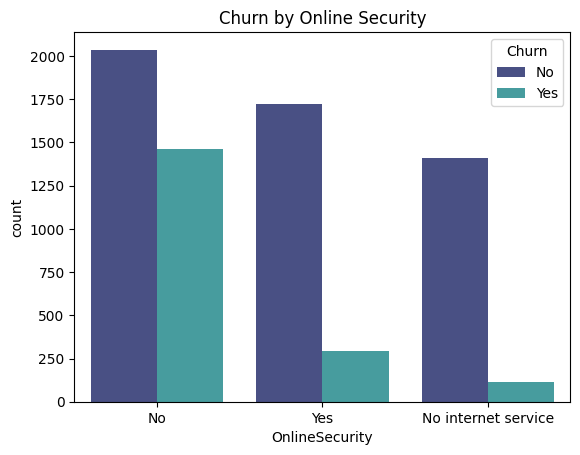

In [ ]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='mako')
plt.title('Churn by Online Security')
plt.show()

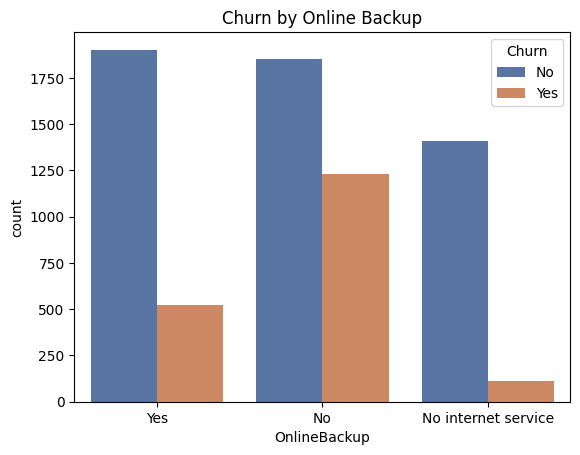

In [ ]:
sns.countplot(x='OnlineBackup', hue='Churn', data=df, palette='deep')
plt.title('Churn by Online Backup')
plt.show()

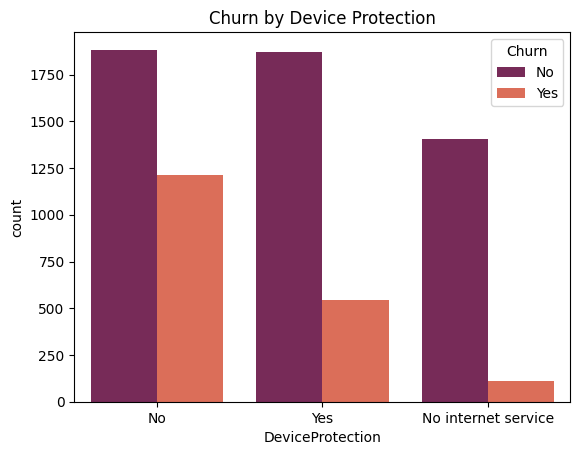

In [ ]:
sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette='rocket')
plt.title('Churn by Device Protection')
plt.show()

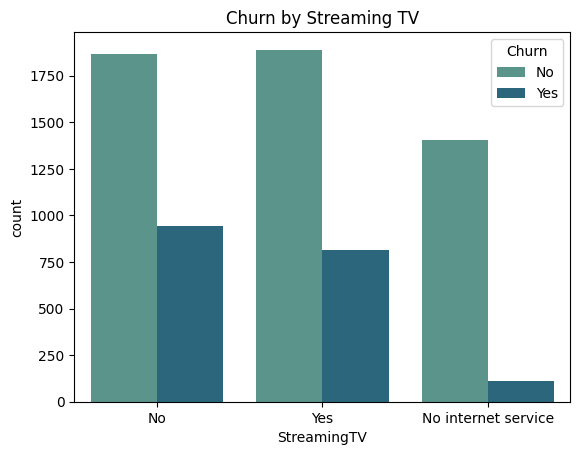

In [ ]:
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='crest')
plt.title('Churn by Streaming TV')
plt.show()

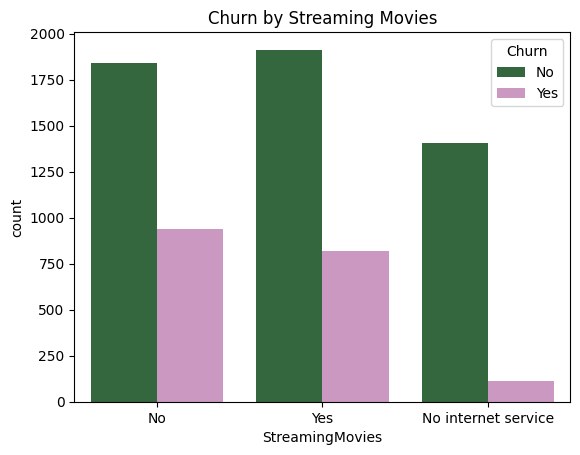

In [ ]:
sns.countplot(x='StreamingMovies', hue='Churn', data=df, palette='cubehelix')
plt.title('Churn by Streaming Movies')
plt.show()

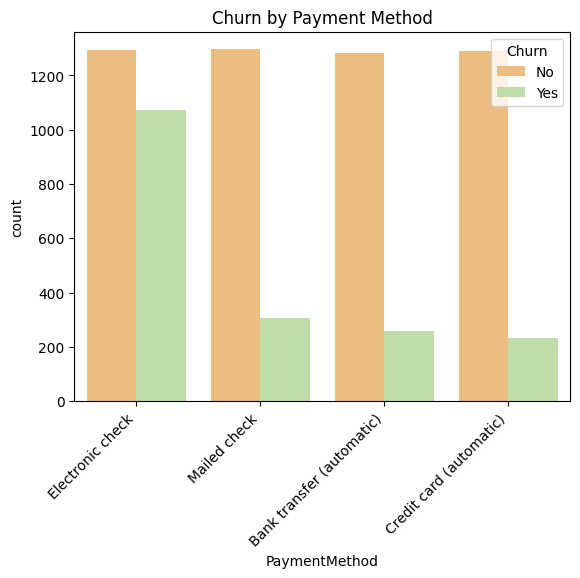

In [ ]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Spectral')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.show()

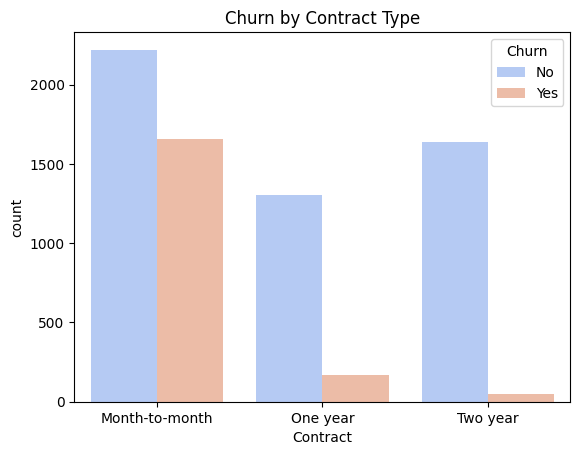

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Contract Type')
plt.show()


In [ ]:
churned_customers = df[df['Churn'] == 'Yes']

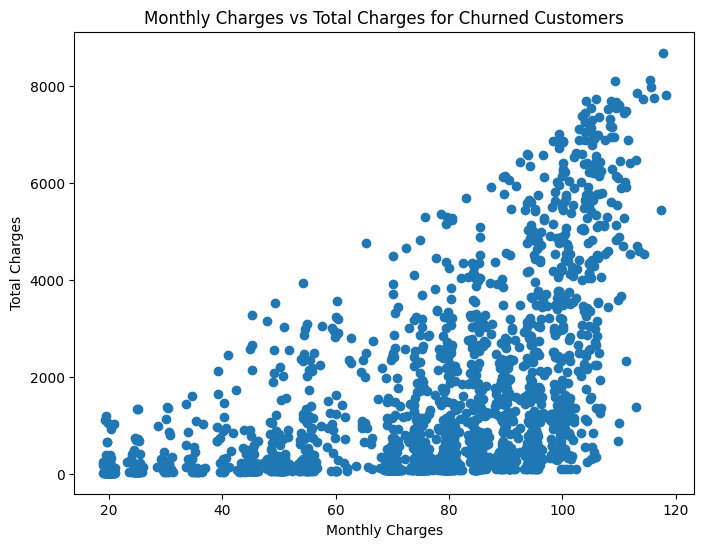

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(churned_customers['MonthlyCharges'], churned_customers['TotalCharges'])
plt.title('Monthly Charges vs Total Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


In [ ]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [ ]:
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
import plotly.figure_factory as ff

corr = df_dummies.corr()

target_corr = corr[['Churn']].sort_values(by='Churn', ascending=False)

mask = np.triu(np.ones_like(target_corr, dtype=bool))
df_mask = target_corr.mask(mask)
df_mask_rounded = df_mask.round(2)

fig = ff.create_annotated_heatmap(
    z=df_mask_rounded.values,
    x=['Churn'],
    y=df_mask_rounded.index.tolist(),
    colorscale='RdBu',
    hoverinfo='none',
    showscale=True,
    ygap=1,
    xgap=1
)

fig.update_xaxes(side='bottom')
fig.update_layout(
    title_text='Correlation with Churn',
    title_font=dict(size=20, color='red'),
    title_x=0.5,
    width=500,
    height=800,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True, autorange='reversed'),
    template='plotly_dark'
)

for annotation in fig.layout.annotations:
    if annotation.text == 'nan':
        annotation.text = ""

fig.show()

In [ ]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [ ]:
x=df_dummies.drop('Churn',axis=1)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7028,0,72,103.20,7362.90,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7029,0,11,29.60,346.45,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
7030,1,4,74.40,306.60,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [ ]:
y=df_dummies['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
pip install shap

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Input
from sklearn.pipeline import make_pipeline
import shap
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

RANDOM FOREST CLASSIFIER

In [ ]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [ ]:
pipe = make_pipeline(model_rf_smote)

pipe.fit(xr_train, yr_train)

yr_train_pred = pipe.predict(xr_train)
train_score_rf = pipe.score(xr_train, yr_train)
print("Training Accuracy Score:", train_score_rf)

yr_test_pred = pipe.predict(xr_test)
test_score_rf = pipe.score(xr_test, yr_test)
print("Testing Accuracy Score:", test_score_rf)

print("Classification Report:\n", classification_report(yr_test, yr_test_pred))

Training Accuracy Score: 0.9454584040747029
Testing Accuracy Score: 0.9388794567062818
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       514
           1       0.93      0.96      0.95       664

    accuracy                           0.94      1178
   macro avg       0.94      0.94      0.94      1178
weighted avg       0.94      0.94      0.94      1178



Confusion Matrix:
 [[467  47]
 [ 25 639]]


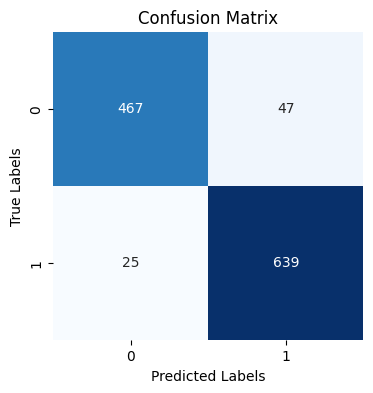

In [ ]:
cm = confusion_matrix(yr_test, yr_test_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

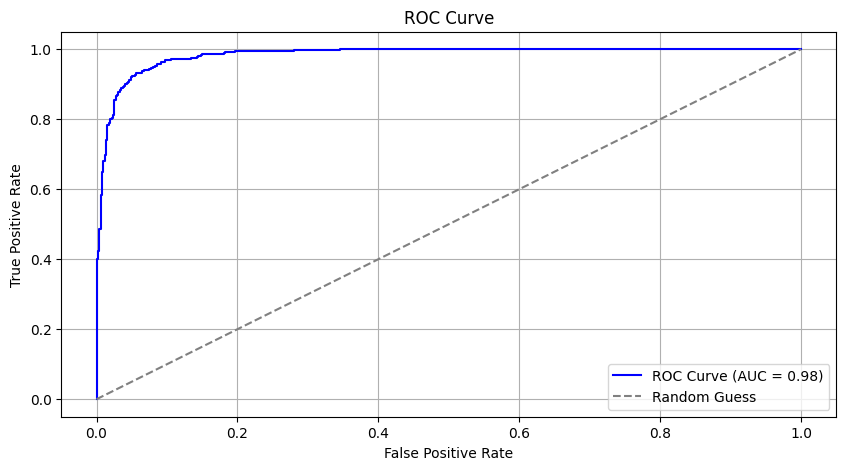

In [ ]:
yr_test_prob = pipe.predict_proba(xr_test)[:, 1]

fpr, tpr, _ = roc_curve(yr_test, yr_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

DECISION TREE CLASSIFIER

In [ ]:
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)

In [ ]:
pipe = make_pipeline(model_dt_smote)

pipe.fit(xr_train, yr_train)

yr_train_pred = pipe.predict(xr_train)
train_score_dt = pipe.score(xr_train, yr_train)
print("Training Accuracy Score:", train_score_dt)

yr_test_pred = pipe.predict(xr_test)

test_score_dt = pipe.score(xr_test, yr_test)
print("Testing Accuracy Score:", test_score_dt)

print("Classification Report:\n", classification_report(yr_test, yr_test_pred))

Training Accuracy Score: 0.9458828522920204
Testing Accuracy Score: 0.931239388794567
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       514
           1       0.95      0.92      0.94       664

    accuracy                           0.93      1178
   macro avg       0.93      0.93      0.93      1178
weighted avg       0.93      0.93      0.93      1178



Confusion Matrix:
 [[484  30]
 [ 51 613]]


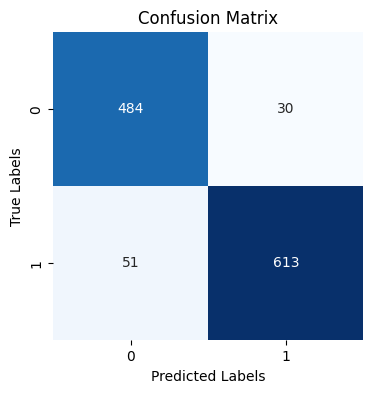

In [ ]:
cm = confusion_matrix(yr_test, yr_test_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

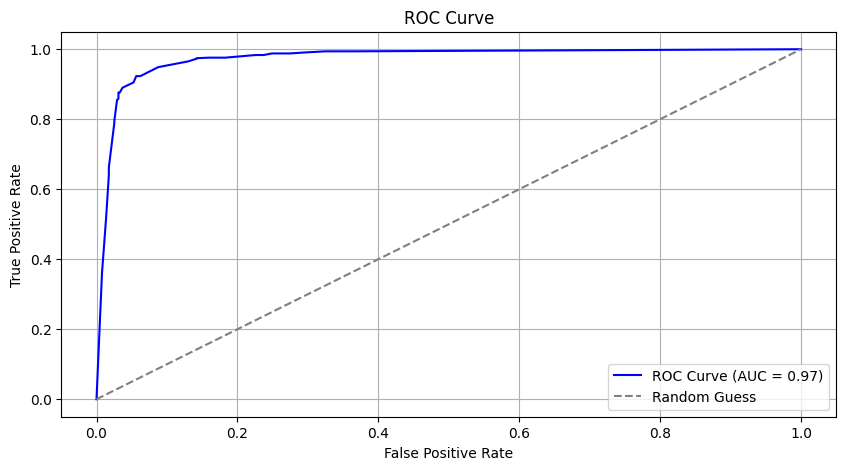

In [ ]:
yr_test_prob = pipe.predict_proba(xr_test)[:, 1]

fpr, tpr, _ = roc_curve(yr_test, yr_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

ADABOOST CLASSIFIER

In [ ]:
model_ada = AdaBoostClassifier(n_estimators=40, random_state=42)

In [ ]:
pipe = make_pipeline(model_ada)

pipe.fit(xr_train, yr_train)

yr_train_pred = pipe.predict(xr_train)
train_score_ada = pipe.score(xr_train, yr_train)
print("Training Accuracy Score:", train_score_ada)

yr_test_pred = pipe.predict(xr_test)

test_score_ada = pipe.score(xr_test, yr_test)
print("Testing Accuracy Score:", test_score_ada)

print("Classification Report:\n", classification_report(yr_test, yr_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy Score: 0.9564940577249575
Testing Accuracy Score: 0.9499151103565365
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       514
           1       0.95      0.96      0.96       664

    accuracy                           0.95      1178
   macro avg       0.95      0.95      0.95      1178
weighted avg       0.95      0.95      0.95      1178



Confusion Matrix:
 [[482  32]
 [ 27 637]]


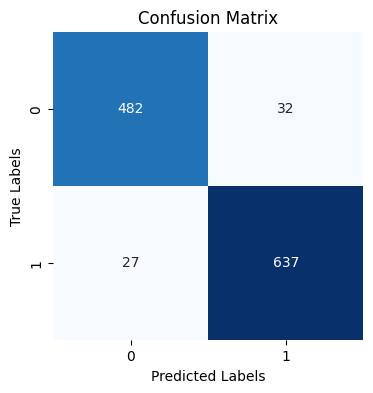

In [ ]:
cm = confusion_matrix(yr_test, yr_test_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

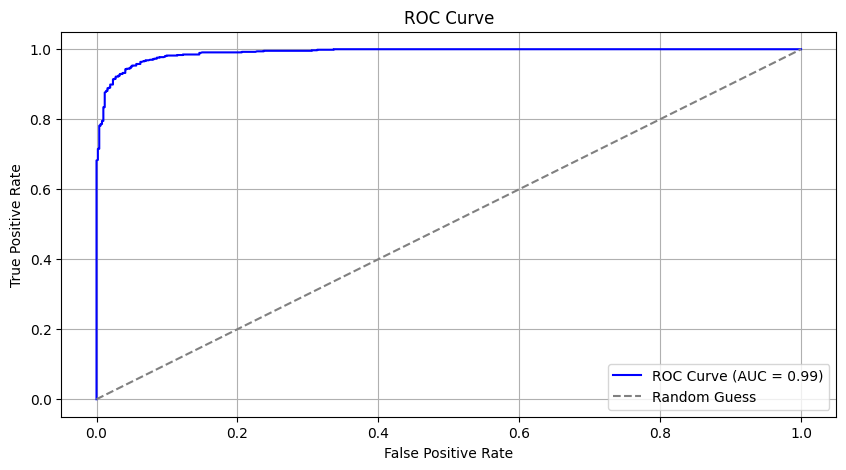

In [ ]:
yr_test_prob = pipe.predict_proba(xr_test)[:, 1]

fpr, tpr, _ = roc_curve(yr_test, yr_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

GRADIENT BOOSTING CLASSIFIER

In [ ]:
model_gbc = GradientBoostingClassifier(n_estimators=50, random_state=42, max_depth=4, min_samples_leaf=8)

In [ ]:
pipe = make_pipeline(model_gbc)

pipe.fit(xr_train, yr_train)

yr_train_pred = pipe.predict(xr_train)
train_score_gbc = pipe.score(xr_train, yr_train)
print("Training Accuracy Score:", train_score_gbc)

yr_test_pred = pipe.predict(xr_test)

test_score_gbc = pipe.score(xr_test, yr_test)
print("Testing Accuracy Score:", test_score_gbc)

print("Classification Report:\n", classification_report(yr_test, yr_test_pred))

Training Accuracy Score: 0.9661805115197633
Testing Accuracy Score: 0.9543533389687235
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       536
           1       0.96      0.96      0.96       647

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183



Confusion Matrix:
 [[508  28]
 [ 26 621]]


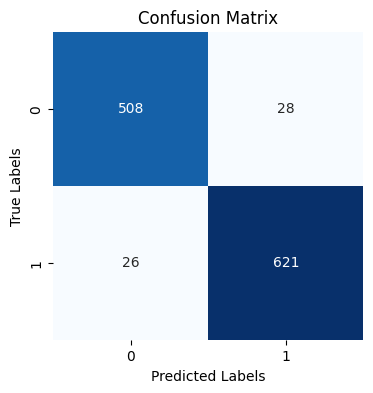

In [ ]:
cm = confusion_matrix(yr_test, yr_test_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

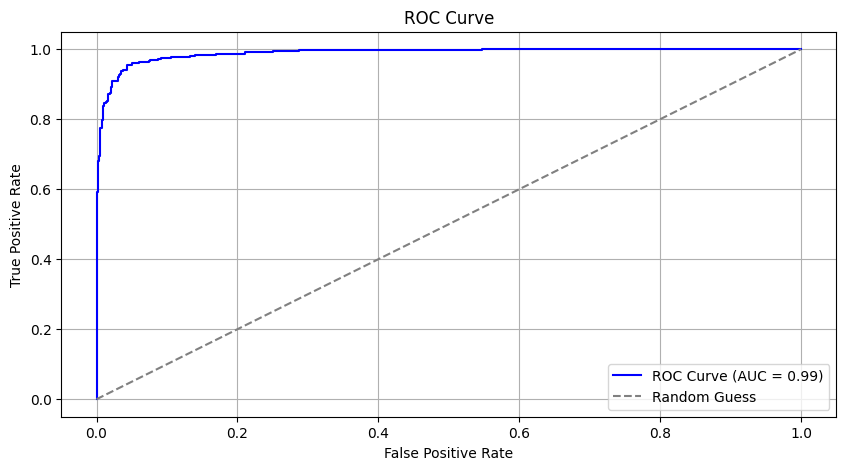

In [ ]:
yr_test_prob = pipe.predict_proba(xr_test)[:, 1]

fpr, tpr, _ = roc_curve(yr_test, yr_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

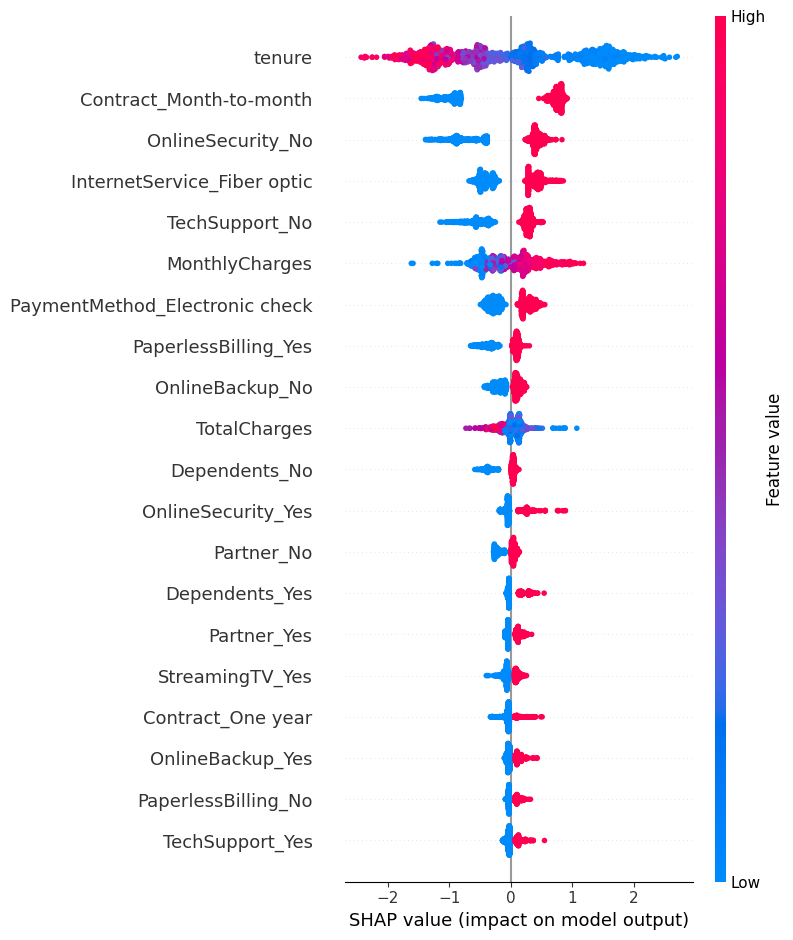

<Figure size 1000x500 with 0 Axes>

In [ ]:
explainer_gbc = shap.TreeExplainer(model_gbc)

shap_values_gbc = explainer_gbc.shap_values(xr_test)

shap.summary_plot(shap_values_gbc, xr_test)

NEURAL NETWORK

In [ ]:
model = Sequential()

model.add(Input(shape=(xr_train.shape[1],)))

model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    xr_train,
    yr_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5606 - loss: 1.7773 - val_accuracy: 0.7668 - val_loss: 0.9835
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7839 - loss: 0.8713 - val_accuracy: 0.7258 - val_loss: 0.7368
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8286 - loss: 0.6182 - val_accuracy: 0.8960 - val_loss: 0.5517
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8372 - loss: 0.5328 - val_accuracy: 0.8466 - val_loss: 0.4842
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8340 - loss: 0.4806 - val_accuracy: 0.8771 - val_loss: 0.4170
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8311 - loss: 0.4837 - val_accuracy: 0.8992 - val_loss: 0.3560
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8465 - loss: 0.4335 - val_accuracy: 0.8950 - val_loss: 0.3369
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8568 - loss: 0.4091 - val_accuracy: 

In [ ]:
yr_test_pred_proba = model.predict(xr_test)
yr_test_pred = (yr_test_pred_proba > 0.5).astype(int)

test_accuracy = accuracy_score(yr_test, yr_test_pred)
print("Testing Accuracy Score:", test_accuracy)

print("Classification Report:\n", classification_report(yr_test, yr_test_pred))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Testing Accuracy Score: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       538
           1       0.93      0.88      0.91       652

    accuracy                           0.90      1190
   macro avg       0.90      0.90      0.90      1190
weighted avg       0.90      0.90      0.90      1190



Confusion Matrix:
 [[495  43]
 [ 76 576]]


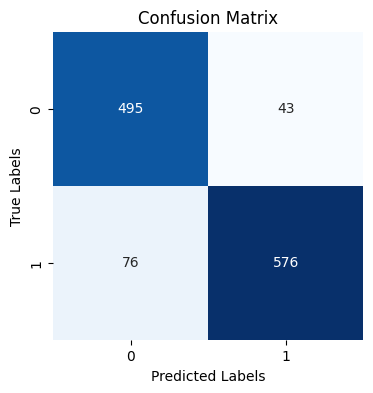

In [ ]:
cm = confusion_matrix(yr_test, yr_test_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

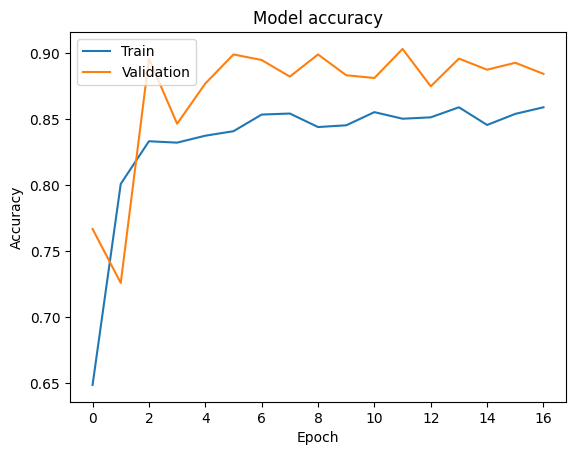

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

XGBOOST CLASSIFIER

In [ ]:
model_xgb = XGBClassifier(n_estimators=100,  max_depth=2, random_state=42)

In [ ]:
pipe = make_pipeline(model_xgb)

pipe.fit(xr_train, yr_train)

yr_train_pred = pipe.predict(xr_train)
train_score_xgb = pipe.score(xr_train, yr_train)
print("Training Accuracy Score:", train_score_xgb)

yr_test_pred = pipe.predict(xr_test)

test_score_xgb = pipe.score(xr_test, yr_test)
print("Testing Accuracy Score:", test_score_xgb)

print("Classification Report:\n", classification_report(yr_test, yr_test_pred))

Training Accuracy Score: 0.9666032551257662
Testing Accuracy Score: 0.9535080304311073
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       536
           1       0.96      0.96      0.96       647

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183



Confusion Matrix:
 [[507  29]
 [ 26 621]]


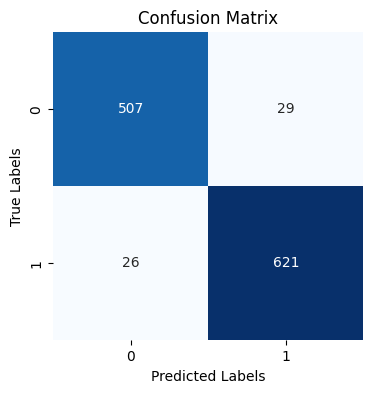

In [ ]:
cm = confusion_matrix(yr_test, yr_test_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

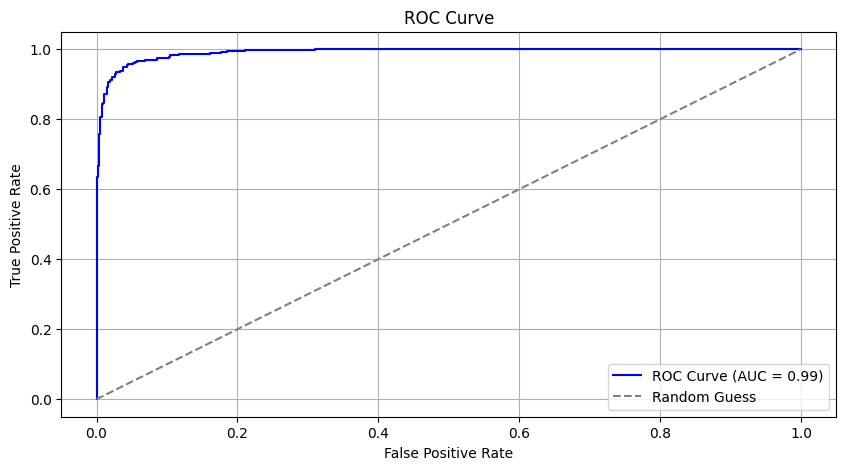

In [ ]:
yr_test_prob = pipe.predict_proba(xr_test)[:, 1]

fpr, tpr, _ = roc_curve(yr_test, yr_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

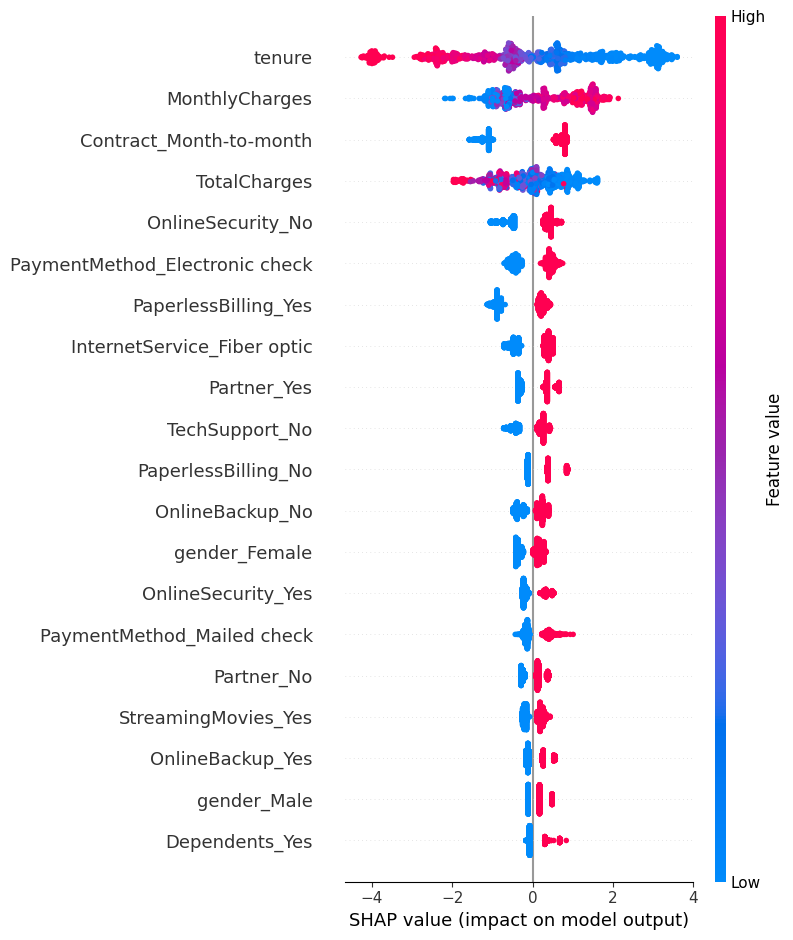

In [ ]:
explainer = shap.TreeExplainer(model_xgb)

shap_values = explainer.shap_values(xr_test)

shap.summary_plot(shap_values, xr_test)

In [ ]:
model_gbc = GradientBoostingClassifier(n_estimators=50, random_state=42, max_depth=4, min_samples_leaf=8)

In [ ]:
pipe = make_pipeline(model_gbc)

pipe.fit(xr_train, yr_train)

yr_train_pred = pipe.predict(xr_train)
train_score_gbc = pipe.score(xr_train, yr_train)
print("Training Accuracy Score:", train_score_gbc)

yr_test_pred = pipe.predict(xr_test)

test_score_gbc = pipe.score(xr_test, yr_test)
print("Testing Accuracy Score:", test_score_gbc)

print("Classification Report:\n", classification_report(yr_test, yr_test_pred))

Training Accuracy Score: 0.9661805115197633
Testing Accuracy Score: 0.9543533389687235
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       536
           1       0.96      0.96      0.96       647

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183



Confusion Matrix:
 [[508  28]
 [ 26 621]]


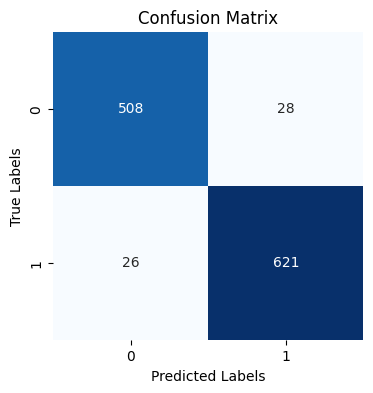

In [ ]:
cm = confusion_matrix(yr_test, yr_test_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

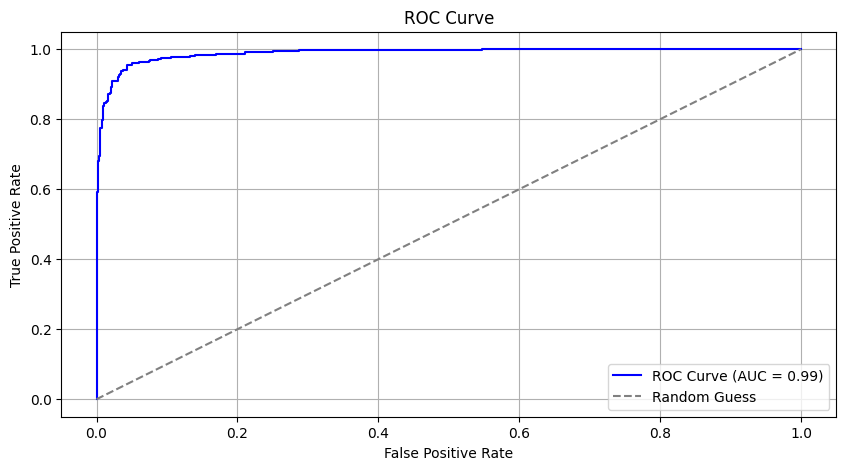

In [ ]:
yr_test_prob = pipe.predict_proba(xr_test)[:, 1]

fpr, tpr, _ = roc_curve(yr_test, yr_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

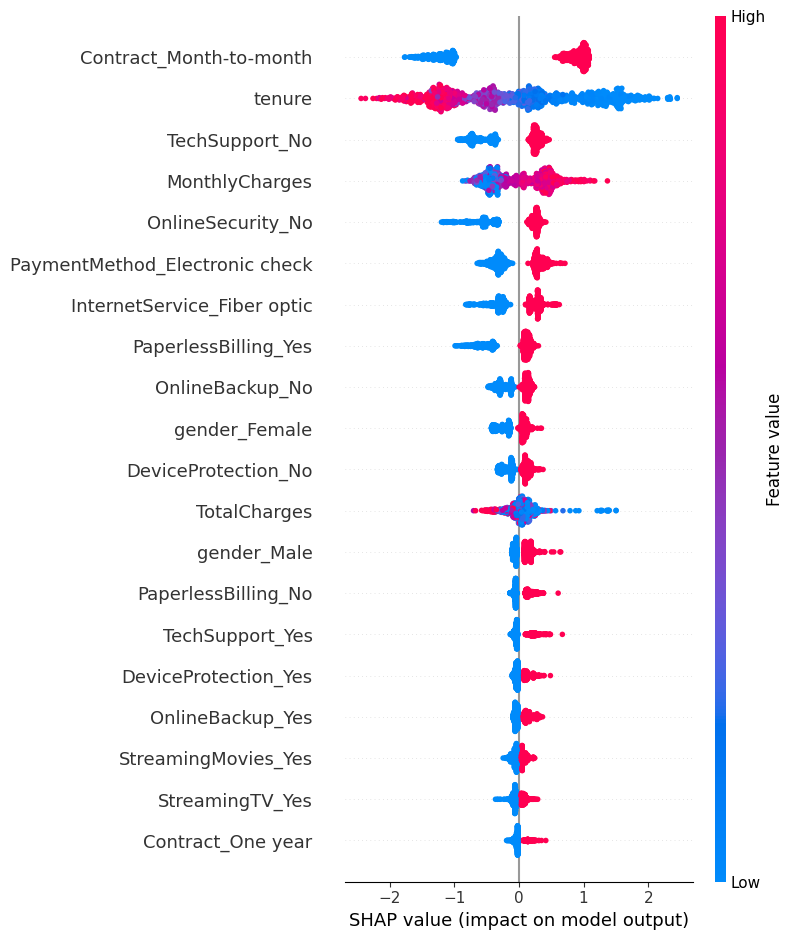

In [ ]:
explainer_gbc = shap.TreeExplainer(model_gbc)

shap_values_gbc = explainer_gbc.shap_values(xr_test)

shap.summary_plot(shap_values_gbc, xr_test)

In [ ]:
import joblib

In [ ]:
joblib.dump(pipe, 'model_pipeline.pkl')
print("Pipeline saved to model_pipeline.pkl")

Pipeline saved to model_pipeline.pkl


In [ ]:
import csv
import json
import os

def csv_to_json(csv_file_path):
    # Check if the CSV file exists
    if not os.path.exists(csv_file_path):
        print("CSV file does not exist.")
        return

    data = []

    with open(csv_file_path, mode='r', encoding='utf-8') as csv_file:
        csv_reader = csv.DictReader(csv_file)

        for row in csv_reader:
            data.append(row)

    json_file_path = os.path.splitext(csv_file_path)[0] + '.json'

    with open(json_file_path, mode='w', encoding='utf-8') as json_file:
        json.dump(data, json_file, indent=4)

    print(f"Successfully converted {csv_file_path} to {json_file_path}")

csv_file_path = input("Enter the path of the CSV file: ")
csv_to_json(csv_file_path)

Enter the path of the CSV file: /content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.xlsx - in.csv
Successfully converted /content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.xlsx - in.csv to /content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.xlsx - in.json
